This part is importing the data. The data used is not the data that directly downloaded from the source website. instead. the data has been cleaned from multiple resource so it can be directly used. The data of City of London also has beed excluded considering thehere are many unavaliable data only for City of London.

This is library used in this code:

In [98]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from matplotlib import pyplot
from scipy.stats import shapiro
import scipy.stats as sps

First step is importing the data. the data has been stored in my public github account so the reader of the code can also download the data when running this.

In [99]:
data_1 = pd.read_csv("https://github.com/hadiyanw/I2P/raw/main/data/assessement3_QM_data.csv", encoding = "utf-8")
print (f" Socioeconomy QM data is {data_1.shape[0]:,} x {data_1.shape[1]}" )
data_1.info()

 Socioeconomy QM data is 32 x 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Boroughs               32 non-null     object 
 1   income_2019            32 non-null     float64
 2   income_2020            32 non-null     float64
 3   Employment_2019        32 non-null     float64
 4   Employment_2020        32 non-null     float64
 5   unemployement_2019     32 non-null     float64
 6   unemployement_2020     32 non-null     float64
 7   degree_education_2019  32 non-null     float64
 8   degree_education_2020  32 non-null     float64
 9   COVID_19_cases         32 non-null     int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 2.6+ KB


after the data imported the first step is get the summary of the data:

In [100]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)#the code is to round the showed number of data
data_1.describe() 

,income_2019,income_2020,Employment_2019,Employment_2020,unemployement_2019,unemployement_2020,degree_education_2019,degree_education_2020,COVID_19_cases
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,599.04,601.54,74.47,74.97,4.58,6.09,54.20,58.47,13048.28
std,76.32,74.93,4.19,4.11,1.32,2.50,10.27,8.58,3977.65
min,471.00,488.20,65.90,66.20,1.10,1.90,33.10,37.60,5377.00
25%,547.60,556.52,71.38,72.60,3.95,4.85,47.25,52.88,9287.50
50%,574.90,576.65,74.80,75.35,4.65,5.90,56.30,60.20,13386.50
75%,644.22,630.60,78.12,77.67,5.40,6.78,61.10,65.30,15430.75
max,763.70,784.30,81.30,84.30,7.60,13.00,71.60,72.80,20482.00


after we get the summary of the data, then we try to conduct first analysis which set hypothesis and prove it wrong. The hypothesis question is whether there is change accross boroughs of for the social-economy aspects after the pandemic came. We set the null hypothesis is there is nothin change before covid-19. Before hypothesis is tested, first the normality of the data should be identified to determine which hypothesis test should be used. 

array([[<AxesSubplot:title={'center':'income_2019'}>,
        <AxesSubplot:title={'center':'income_2020'}>,
        <AxesSubplot:title={'center':'Employment_2019'}>],
       [<AxesSubplot:title={'center':'Employment_2020'}>,
        <AxesSubplot:title={'center':'unemployement_2019'}>,
        <AxesSubplot:title={'center':'unemployement_2020'}>],
       [<AxesSubplot:title={'center':'degree_education_2019'}>,
        <AxesSubplot:title={'center':'degree_education_2020'}>,
        <AxesSubplot:title={'center':'COVID_19_cases'}>]], dtype=object)

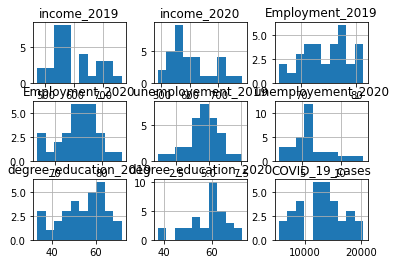

In [101]:
data_1.hist()

In [102]:
stat, p =shapiro(data_1['income_2019'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('income_2019 is not normal')
else:
    print('income_2019 is normal')
    
stat, p =shapiro(data_1['income_2020'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('income_2020 is not normal')
else:
    print('income_2020 is normal')



stat, p =shapiro(data_1['Employment_2019'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('Employment_2019 is not normal')
else:
    print('Employment_2019 is normal')
    
stat, p =shapiro(data_1['Employment_2020'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('Employment_2020 is not normal')
else:
    print('Employment_2020 is normal')


stat, p =shapiro(data_1['unemployement_2019'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('unemployement_2019 is not normal')
else:
    print('unemployement_2019 is normal')
    
stat, p =shapiro(data_1['unemployement_2020'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('unemployement_2020 is not normal')
else:
    print('unemployement_2020 is normal')

stat, p =shapiro(data_1['degree_education_2019'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('degree_education_2019 is not normal')
else:
    print('degree_education_2019 is normal')
    
stat, p =shapiro(data_1['degree_education_2020'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('degree_education_2020 is not normal')
else:
    print('degree_education_2020 is normal')
    
stat, p =shapiro(data_1['COVID_19_cases'])
print('stat=%.3f,p=%.3f\n'%(stat,p))
if p > 0.05:
    print('COVID_19_cases is not normal')
else:
    print('COVID_19_cases is normal')

stat=0.926,p=0.031

income_2019 is normal
stat=0.918,p=0.019

income_2020 is normal
stat=0.967,p=0.418

Employment_2019 is not normal
stat=0.986,p=0.935

Employment_2020 is not normal
stat=0.980,p=0.800

unemployement_2019 is not normal
stat=0.939,p=0.072

unemployement_2020 is not normal
stat=0.959,p=0.262

degree_education_2019 is not normal
stat=0.955,p=0.193

degree_education_2020 is not normal
stat=0.972,p=0.557

COVID_19_cases is not normal


The next step is doing hypothesis testing. The first thing to do hypothesis testing is set up the hypothesis. Also to look whether the conditions of the variables change or not, this study will use mean comparison test. The test will be conducted to every variables between year 2019 and 2020
 H0 = The mean of data 2019 = data 2020
 H1 = The mean of data 2019 is <or> data 2020

In [65]:
# set significance level
alpha = 0.05

# make the parameter whether we should use hypothesis testing or not to clarify the difference of mean between 2 variables. 
#If the result is outside the range then we shouldn't have to use hypothesis testing, instead we can compare the difference between 2 standar deviation only
std_income_2019=76.32
std_income_2020=74.93
std_employement_2019=4.19
std_employement_2020=4.11
std_unemployement_2019=1.32
std_unemployement_2020=2.50
std_degree_education_2019=10.27
std_degree_education_2020=8.58

std_ratio_income=std_income_2019/std_income_2020
if std_ratio_income > 0.5 and std_ratio_income < 2:
    print("Can assume equal income standard deviations.")
    equal_stds_income = True
else:
    print("Cannot assume equal income standard deviations.")
    equal_stds_income = False

std_ratio_employement=std_employement_2019/std_employement_2020
if std_ratio_employement > 0.5 and std_ratio_employement < 2:
    print("Can assume equal employement standard deviations.")
    equal_stds_employement = True
else:
    print("Cannot assume equal employement standard deviations.")
    equal_stds_employement = False
    
std_ratio_unemployement=std_unemployement_2019/std_unemployement_2020
if std_ratio_unemployement > 0.5 and std_ratio_unemployement < 2:
    print("Can assume equal unemployement standard deviations.")
    equal_stds_unemployement = True
else:
    print("Cannot assume equal unemployement standard deviations.")
    equal_stds_unemployement = False
    
std_ratio_education=std_degree_education_2019/std_degree_education_2020
if std_ratio_education > 0.5 and std_ratio_education < 2:
    print("Can assume equal education standard deviations.")
    equal_stds_education = True
else:
    print("Cannot assume equal education standard deviations.")
    equal_stds_education = False


Can assume equal income standard deviations.
Can assume equal employement standard deviations.
Can assume equal unemployement standard deviations.
Can assume equal education standard deviations.


In [69]:
#confirming all compared data are equal, we do next step which is generate testing value for each compared variables

test_stat, p_value_income = sps.ttest_ind(data_1['income_2019'], data_1['income_2020'], equal_var = equal_stds_income)
print("p-value_income =", p_value_income)

test_stat, p_value_employement = sps.ttest_ind(data_1['Employment_2019'], data_1['Employment_2020'], equal_var = equal_stds_employement)
print("p-value_employement=", p_value_employement)

test_stat, p_value_unemployement = sps.ttest_ind(data_1['unemployement_2019'], data_1['unemployement_2020'], equal_var = equal_stds_unemployement)
print("p-value_unemployement =", p_value_unemployement)

test_stat, p_value_education = sps.ttest_ind(data_1['degree_education_2019'], data_1['degree_education_2020'], equal_var = equal_stds_education)
print("p-value_education=", p_value_education)

p-value_income = 0.8951017287753458
p-value_employement= 0.6270541853921614
p-value_unemployement = 0.0036474765696420087
p-value_education= 0.07601796239562238


In [72]:
#Then the last step we can write the conclution of the test with codes below
if p_value_income < alpha:
    print("p_value_income < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from income with different means.")
elif p_value_income >= alpha:
    print("p_value_income >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from income with the same mean.")
print( )    
if p_value_employement < alpha:
    print("p_value_employement < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from employement with different means.")
elif p_value_employement >= alpha:
    print("p_value_employement >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from employement with the same mean.")
print( ) 
if p_value_unemployement < alpha:
    print("p_value_unemployement < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from unemployement with different means.")
elif p_value_unemployement >= alpha:
    print("p_value_unemployement >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from unemployement with the same mean.")
print( )     
if p_value_education < alpha:
    print("p_value_education < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from education with different means.")
elif p_value_education >= alpha:
    print("p_value_education >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from education with the same mean.")

p_value_income >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from income with the same mean.

p_value_employement >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from employement with the same mean.

p_value_unemployement < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from unemployement with different means.

p_value_education >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from education with the same mean.


From the hypothesis result we get the result that only unemployement variable that significantly change in 2019-2020.
the next step is we conducting correlation analysis to determine whether covid-19 play significance role here.
the analysis that will be used is Pearson correlation.

In [103]:
data_1[data_1.columns[1:]].corr(method='pearson')['COVID_19_cases'][:-1]

income_2019             -0.59
income_2020             -0.53
Employment_2019         -0.23
Employment_2020         -0.10
unemployement_2019       0.20
unemployement_2020      -0.07
degree_education_2019   -0.57
degree_education_2020   -0.47
Name: COVID_19_cases, dtype: float64

In [90]:
data_2=data_1
data_2['income_change']=data_2['income_2020']-data_2['income_2019']
data_2['employment_change']=data_2['Employment_2020']-data_2['Employment_2019']
data_2['unemployment_change']=data_2['unemployement_2020']-data_2['unemployement_2019']
data_2['education_change']=data_2['degree_education_2020']-data_2['degree_education_2019']

data_2.drop(['income_2020','income_2019','Employement_2020','Employment_2019','unemployement_2020','unemployement_2019','degree_education_2020','degree_education_2019'], inplace=True)

data_2.describe()

KeyError: 'income_2020'

In [94]:
data_2.head(32)

,Boroughs,COVID_19_cases,income_change,employment_change,unemployment_change,education_change
0,Barking and Dagenham,13545,29.40,-2.30,3.80,11.80
1,Barnet,17408,-16.20,0.30,0.10,8.50
2,Bexley,14000,14.90,1.90,1.30,2.10
3,Brent,14562,16.70,-1.70,-2.40,2.60
4,Bromley,15286,-29.90,-2.00,1.30,-1.60
5,Camden,8364,-42.20,-0.80,-0.30,4.40
6,Croydon,16955,3.10,-0.30,2.60,5.60
7,Ealing,15865,42.70,2.70,1.90,2.20
8,Enfield,18091,-1.90,2.10,-1.40,5.60
9,Greenwich,12384,-4.10,-1.20,1.40,12.40


In [97]:
data_2[data_2.columns[1:]].corr(method='pearson')['COVID_19_cases']

COVID_19_cases         1.00
income_change          0.27
employment_change      0.21
unemployment_change   -0.20
education_change       0.38
Name: COVID_19_cases, dtype: float64